In [40]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import seaborn as sns
import pandas as pd


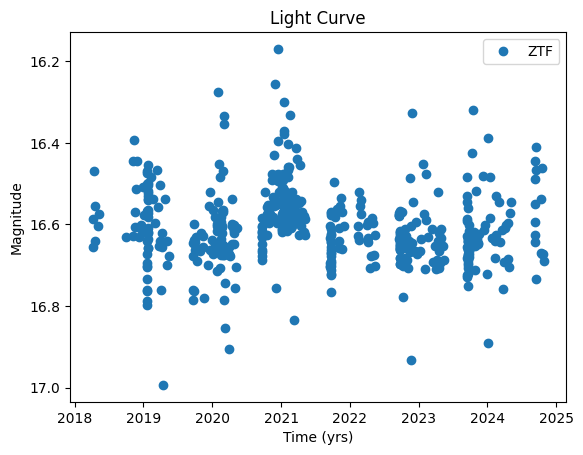

In [47]:
# ztf mags
ztf_file = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ZTF Data/lc_samiclagn.fits'
ztf_data = fits.open(ztf_file)[1].data
mag_ztf = ztf_data['mag']
hjd_ztf = ztf_data['hjd']

from astropy.time import Time
from astropy.table import Table

t = Table.read(ztf_file)

time_ztf = Time(hjd_ztf, format='jd')
time_ztf = time_ztf.decimalyear
plt.plot(time_ztf, mag_ztf, 'o', label='ZTF')
plt.gca().invert_yaxis()
plt.xlabel('Time (yrs)')
plt.ylabel('Magnitude')
plt.title('Light Curve')
plt.legend()

colours = ztf_data['filtercode']


In [30]:
# atlas mags
#index of band is 5


filepath = '/Users/shaunparasher/Documents/VS Code/denison_2026_test/shaun/Data/ATLAS data/job3635727.txt'

catt = []
with open(filepath, 'r') as atlas:

    for i in atlas:
        catt.append(i.split())
    
    cat = np.array(catt)

    o_cat = np.array([])

    mask = (cat[:, 5] == 'o')
    o_cat = cat[mask]

    print(o_cat)

[['57323.650927' '18.891' '0.735' ... '17.76' '18.24' '02a57323o0699o']
 ['57366.530546' '18.858' '0.229' ... '19.12' '21.13' '02a57366o0511o']
 ['57388.563889' '19.869' '0.505' ... '19.07' '20.58' '02a57388o0587o']
 ...
 ['61052.527277' '19.290' '0.118' ... '19.73' '21.28' '01a61052o0466o']
 ['61052.530484' '-20.651' '0.401' ... '19.67' '21.27' '01a61052o0473o']
 ['61052.535925' '-21.303' '0.862' ... '19.65' '21.28' '01a61052o0484o']]


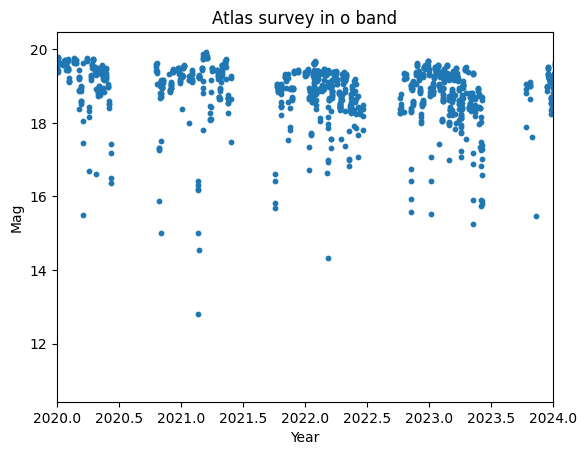

In [31]:
mjd = o_cat[:, 0].astype(float)
mags = o_cat[:, 16].astype(float)


t_years = Time(mjd, format='mjd').decimalyear

plt.scatter(t_years, mags, s=10)
plt.xlabel('Year')
plt.ylabel('Mag')
plt.xlim(2020, 2024)
plt.title("Atlas survey in o band")

plt.show()